In [1]:
###Tutorial Overview
# 1. Breast Cancer Categorical dataset
# 2. Categorical Feature Selection
# 3. Modeling with Selected Features


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

D:\Anaconda_Distribution\envs\newEnv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [11]:
def load_dataset(filename):
    dataset  = pd.read_csv(filename,header=None)
    
    data = dataset.values
    
    X = data[:,:-1]
    y = data[:,-1]
    
    X = X.astype(str)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=1)
    
    return X_train,X_test,y_train,y_test

In [12]:
X_train,X_test,y_train,y_test = load_dataset('../dataset/breast-cancer.csv')

print("Training size", X_train.shape,y_train.shape)
print("Testing size", X_test.shape,y_test.shape)

Training size (191, 9) (191,)
Testing size (95, 9) (95,)


In [13]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

def prepare_input(X_train,X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    
    X_train_oe = oe.transform(X_train)
    X_test_oe = oe.transform(X_test)
    
    return X_train_oe,X_test_oe,oe

def prepare_target(y_train,y_test):
    le = LabelEncoder()
    le.fit(y_train)
    
    y_train_le = le.transform(y_train)
    y_test_le = le.transform(y_test)
    
    return y_train_le,y_test_le,le

In [15]:
# preparing input data
X_train_oe,X_test_oe,oe = prepare_input(X_train,X_test)

#preparing output data
y_train_le,y_test_le,le = prepare_target(y_train,y_test)

In [16]:
print("Train",X_train_oe.shape,y_train_le.shape)
print("Test",X_test_oe.shape,y_test_le.shape)

Train (191, 9) (191,)
Test (95, 9) (95,)


###  Categorical Feature Selection

#### Chi-Squared Feature Selection

In [18]:
## Pearson's Chi-Squared statistical hypothesis test is an example of a test for independence between two categorical variables
# The results of this test can be used for feature selection , where those features that are independent for target variable
# can be removed from the dataset
# Sklearn library has implementation Chi2()

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

def select_features(X_train,y_train,X_test,scoreFun,numFeature="all"):
    
    fs = SelectKBest(score_func=scoreFun , k=numFeature)

    fs.fit(X_train,y_train)

    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    
    return X_train_fs,X_test_fs,fs


Train set (191, 9) (191,)
Test set (95, 9) (95,)
Feature 0 : 0.472553
Feature 1 : 0.029193
Feature 2 : 2.137658
Feature 3 : 29.381059
Feature 4 : 8.222601
Feature 5 : 8.100183
Feature 6 : 1.273822
Feature 7 : 0.950682
Feature 8 : 3.699989


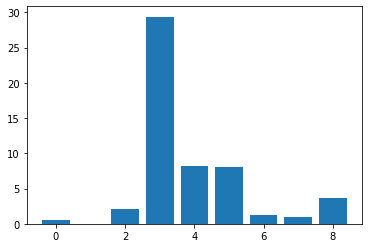

In [22]:
##### Printing the feature importance
import matplotlib.pyplot as plt

###Loading the dataset
X_train,X_test,y_train,y_test = load_dataset('../dataset/breast-cancer.csv')

print("Train set",X_train.shape,y_train.shape)
print("Test set", X_test.shape,y_test.shape)

# Feature encoding 
X_train_oe,X_test_oe,oe  = prepare_input(X_train,X_test)

y_train_le,y_test_le,le = prepare_target(y_train,y_test)

#Selecting the features
X_train_fs,X_test_fs,fs = select_features(X_train_oe,y_train_le,X_test_oe,chi2,"all")

## printing the scores of each feature
for i in range(len(fs.scores_)):
    print("Feature %d : %f"%(i,fs.scores_[i]))

# plotting the bar plot
plt.bar([i for i in range(len(fs.scores_))],fs.scores_)
plt.show()

#### Mutual Information feature selection

Train set (191, 9) (191,)
Test set (95, 9) (95,)
Feature 0 : 0.000000
Feature 1 : 0.000000
Feature 2 : 0.013399
Feature 3 : 0.024430
Feature 4 : 0.044822
Feature 5 : 0.013430
Feature 6 : 0.000000
Feature 7 : 0.000000
Feature 8 : 0.003771


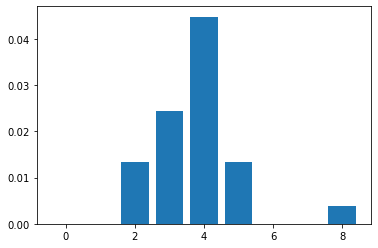

In [36]:
from sklearn.feature_selection import mutual_info_classif
##### Printing the feature importance
import matplotlib.pyplot as plt

###Loading the dataset
X_train,X_test,y_train,y_test = load_dataset('../dataset/breast-cancer.csv')

print("Train set",X_train.shape,y_train.shape)
print("Test set", X_test.shape,y_test.shape)

# Feature encoding 
X_train_oe,X_test_oe,oe  = prepare_input(X_train,X_test)

y_train_le,y_test_le,le = prepare_target(y_train,y_test)

#Selecting the features
X_train_fs,X_test_fs,fs = select_features(X_train_oe,y_train_le,X_test_oe,mutual_info_classif,"all")

## printing the scores of each feature
for i in range(len(fs.scores_)):
    print("Feature %d : %f"%(i,fs.scores_[i]))

# plotting the bar plot
plt.bar([i for i in range(len(fs.scores_))],fs.scores_)
plt.show()


#### Model Built using all features

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

###Loading the dataset
X_train,X_test,y_train,y_test = load_dataset('../dataset/breast-cancer.csv')

print("Train set",X_train.shape,y_train.shape)
print("Test set", X_test.shape,y_test.shape)

# Feature encoding 
X_train_oe,X_test_oe,oe  = prepare_input(X_train,X_test)

y_train_le,y_test_le,le = prepare_target(y_train,y_test)


model = LogisticRegression(solver="lbfgs")

model.fit(X_train_oe,y_train_le)

yhat = model.predict(X_test_oe)

accr = accuracy_score(y_test_le,yhat) * 100
print("Accuracy is %.3f"%(accr))

Train set (191, 9) (191,)
Test set (95, 9) (95,)
Accuracy is 75.789


####  Model built using Chi Square with best 4 models

In [35]:
###Loading the dataset
X_train,X_test,y_train,y_test = load_dataset('../dataset/breast-cancer.csv')

print("Train set",X_train.shape,y_train.shape)
print("Test set", X_test.shape,y_test.shape)

# Feature encoding 
X_train_oe,X_test_oe,oe  = prepare_input(X_train,X_test)

y_train_le,y_test_le,le = prepare_target(y_train,y_test)

# Feature selection
X_train_fs,X_test_fs,fs = select_features(X_train_oe,y_train_le,X_test_oe,chi2,4)

model = LogisticRegression(solver="lbfgs")

model.fit(X_train_fs,y_train_le)

yhat = model.predict(X_test_fs)

accr = accuracy_score(y_test_le,yhat) * 100
print("Accuracy is %.3f"%(accr))

Train set (191, 9) (191,)
Test set (95, 9) (95,)
Accuracy is 74.737


####  Model built using Mutual information with best 4 models

In [33]:
###Loading the dataset
X_train,X_test,y_train,y_test = load_dataset('../dataset/breast-cancer.csv')

print("Train set",X_train.shape,y_train.shape)
print("Test set", X_test.shape,y_test.shape)

# Feature encoding 
X_train_oe,X_test_oe,oe  = prepare_input(X_train,X_test)

y_train_le,y_test_le,le = prepare_target(y_train,y_test)

# Feature selection
X_train_fs,X_test_fs,fs = select_features(X_train_oe,y_train_le,X_test_oe,mutual_info_classif,4)

model = LogisticRegression(solver="lbfgs")

model.fit(X_train_fs,y_train_le)

yhat = model.predict(X_test_fs)

accr = accuracy_score(y_test_le,yhat) * 100
print("Accuracy is %.3f"%(accr))

Train set (191, 9) (191,)
Test set (95, 9) (95,)
Accuracy is 66.316
